**Table of contents**<a id='toc0_'></a>    
- [Описание проекта](#toc1_)    
- [Импорт библиотек](#toc2_)    
- [Подготовка данных](#toc3_)    
- [Исследование задачи и баланса классов](#toc4_)    
- [Борьба с дисбалансом классов](#toc5_)    
- [Тестирование лучшей модели](#toc6_)    
- [Результат](#toc7_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Описание проекта](#toc0_)

<p><img style="float:right; margin:20px; padding:20px; max-height:400px" src="https://as2.ftcdn.net/v2/jpg/03/08/02/45/1000_F_308024548_kMQJ3FWfmUX2djOl9tAYCYeToAs97o6h.jpg"></p>
<p style="text-align:justify;">

**Описание проблемы**

Из «South Park Bank» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых. Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

**Цель**

Моя цель состоит в том, чтобы разработать модель, способную предсказать, уйдет ли клиент из нашего банка в ближайшем будущем или нет. Я стремлюсь построить модель с высоким значением F1-меры, которая является важной метрикой для нашего проекта. Необходимо достичь значения F1-меры не менее 0.59, чтобы успешно завершить проект. Кроме того, я также буду оценивать AUC-ROC и сравнивать его со значением F1-меры.

**Источник данных:** [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

# <a id='toc2_'></a>[Импорт библиотек](#toc0_)

In [1]:
#Pandas
import pandas as pd

#np
import numpy as np

#plt
import matplotlib.pyplot as plt

#Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, roc_auc_score, precision_recall_curve
from sklearn.linear_model import LogisticRegression 
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

# <a id='toc3_'></a>[Подготовка данных](#toc0_)

In [2]:
data = pd.read_csv('/datasets/Churn.csv')

**Осмотр данных**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
display(data.head())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [5]:
print(data.nunique())

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64


Есть пропуски в столбце Tenure

In [6]:
print(data['Tenure'].isna().sum())
print(data['Tenure'].unique())

909
[ 2.  1.  8.  7.  4.  6.  3. 10.  5.  9.  0. nan]


In [7]:
display(data.query('Tenure.isna()').head(10))

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
82,83,15641732,Mills,543,France,Female,36,NaN,0.00,2,0,0,26019.59,0
85,86,15805254,Ndukaku,652,Spain,Female,75,NaN,0.00,2,1,1,114675.75,0
94,95,15676966,Capon,730,Spain,Male,42,NaN,0.00,2,0,1,85982.47,0
99,100,15633059,Fanucci,413,France,Male,34,NaN,0.00,2,0,0,6534.18,0
111,112,15665790,Rowntree,538,Germany,Male,39,NaN,108055.10,2,1,0,27231.26,0


<style>
    .bordered-cell {
        border: 3px solid black;
        padding: 10px;
    }
</style>

<div class="bordered-cell">

**Вывод**

Не до конца понятно, что делать с этими пропусками. Первая догадка, что это клиенты в первый год их обслуживания, хотя есть записи клиентов со значением 0. Заполню пропуски значением 0.

In [8]:
data['Tenure'].fillna(0, inplace=True)

**Данные которые не нужны для обучения модели:**
- RowNumber
- CustomerId
- Surname

In [9]:
# Удаляю столбцы ненужные
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
# Проверка
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


**Столбцы gender и geography содержат категории в виде строк,** их нужно переделать в категориальную переменную через OHE

**Создаю тестовую, валидационную и обучающую выборки**

In [11]:
# Разделение на целевой признак и объекты
target = data["Exited"]
features = data.drop("Exited", axis=1)

# Разделение на выборки
features_train, features_valid_test, target_train, target_valid_test = train_test_split(
    features, target, test_size=0.4, random_state=12345, stratify=target
)
# Разделяю дальше
features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid_test,
    target_valid_test,
    test_size=0.5,
    random_state=12345,
    stratify=target_valid_test,
)

In [12]:
# One-hot encoding для всех выборок
features_train = pd.get_dummies(features_train, drop_first=True)
features_valid = pd.get_dummies(features_valid, drop_first=True)
features_test = pd.get_dummies(features_test, drop_first=True)

# Масштабирование
# Список признаков количественных
numeric = ['CreditScore', 'Age', 'Tenure',
           'Balance', 'NumOfProducts', 'EstimatedSalary']
# Убираю предупреждение
pd.options.mode.chained_assignment = None
# Создаю и обучаю scaler
scaler = StandardScaler()
scaler.fit(features_train[numeric])
# Масштабирую признаки
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

<style>
    .bordered-cell {
        border: 3px solid black;
        padding: 10px;
    }
</style>

<div class="bordered-cell">

**Вывод**

Начальные выборки созданы, сделано OHE, разделение 60:20:20, со стратификацией

# <a id='toc4_'></a>[Исследование задачи и баланса классов](#toc0_)

**Изучаю баланс классов**

In [13]:
print(data['Exited'].value_counts())

0    7963
1    2037
Name: Exited, dtype: int64


**Вывод**
- Баланс классов примерно 20% положительных и 80% отрицательных

**Ищу параметры к первой пробной модели "случайного леса".** 
- Выбрал эту модель исходя из предыщуего опыта.
- В переборе хотел увидеть сравнение и по F1-мере и по скору, поэтому условие двойное

In [14]:
%%time

# Перебираю гиперпараметры сравнивая модель по метрике Score,
# вывожу также F1-меру для каждой модели которая лучше предыдущей
# Поиск стандартный, как в тренажере, но ради интереса в условии сравнения добавил
# вывод новой модели исходя из обоих параметров

best_score = 0
best_f1 = 0
for depth in range(1, 20, 2):
    for est in range(1, 101, 20):
        model = RandomForestClassifier(
            max_depth=depth, n_estimators=est, random_state=12345
        )
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_valid)
        if best_score < model.score(features_valid, target_valid) or best_f1 < f1_score(
            target_valid, predicted_valid
        ):
            best_score = model.score(features_valid, target_valid)
            best_f1 = f1_score(target_valid, predicted_valid)
            print(
                "Score=",
                model.score(features_valid, target_valid),
                "F1=",
                f1_score(target_valid, predicted_valid),
                "depth=",
                depth,
                "n_est=",
                est,
            )
print("best score=", best_score, "best f1=", best_f1)


Score= 0.8235 F1= 0.2661122661122662 depth= 1 n_est= 1
Score= 0.824 F1= 0.26666666666666666 depth= 3 n_est= 1
Score= 0.825 F1= 0.2616033755274262 depth= 3 n_est= 41
Score= 0.8255 F1= 0.26526315789473687 depth= 3 n_est= 61
Score= 0.8435 F1= 0.4685908319185059 depth= 5 n_est= 1
Score= 0.8605 F1= 0.5578446909667195 depth= 5 n_est= 21
Score= 0.8605 F1= 0.5633802816901409 depth= 7 n_est= 21
Score= 0.8635 F1= 0.5687203791469194 depth= 7 n_est= 41
Score= 0.869 F1= 0.598159509202454 depth= 9 n_est= 21
Score= 0.8685 F1= 0.6009104704097117 depth= 11 n_est= 41
Score= 0.869 F1= 0.6077844311377246 depth= 15 n_est= 61
Score= 0.8665 F1= 0.6090775988286969 depth= 17 n_est= 41
Score= 0.8675 F1= 0.6074074074074075 depth= 17 n_est= 81
Score= 0.871 F1= 0.618343195266272 depth= 19 n_est= 41
best score= 0.871 best f1= 0.618343195266272
CPU times: user 11.1 s, sys: 112 ms, total: 11.2 s
Wall time: 11.2 s


<style>
    .bordered-cell {
        border: 3px solid black;
        padding: 10px;
    }
</style>

<div class="bordered-cell">

**Вывод**
- Лучшая модель Score = 0.8705 F1 = 0.6174298375184638 depth = 19 n_est = 81
- Пробовал с увеличением количества деревьев и глубины, вроде получается лучше, но незначительно

**Исследую модель логистической регресии**

In [15]:
model = LogisticRegression(random_state=12345, solver="liblinear", class_weight="balanced")
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print(
    "Score =",
    model.score(features_valid, target_valid),
    "F1 =",
    f1_score(target_valid, predicted_valid),
)

Score= 0.7325 F1= 0.5302897278314311


<style>
    .bordered-cell {
        border: 3px solid black;
        padding: 10px;
    }
</style>

<div class="bordered-cell">

**Вывод**

- На признаках без масштаба модель имела показатели: Score= 0.7905 F1= 0.06263982102908278
- С масштабированием признаков: Score= 0.811 F1= 0.3076923076923077
- А если добавить баланс признаков: Score= 0.7325 F1= 0.5302897278314311

**Тестирую модель "случайного леса" с параметрами**
- depth=19 n_est=81

In [16]:
# Объединяю выборки обучающую и валидационную для тренировки модели
features_train_valid = pd.concat([features_train, features_valid])
target_train_valid = pd.concat([target_train, target_valid])

Тест модели depth=26 n_est=141
Score = 0.855
auc_roc = 0.8455713031984218
precision = 0.7349397590361446
recall = 0.44963144963144963
F1= 0.5579268292682927


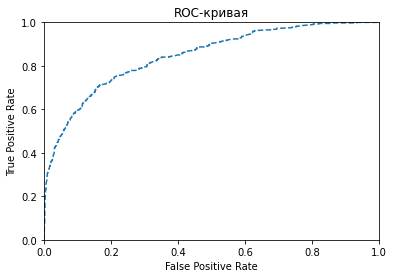

In [17]:
# Анализ для модели depth= 19 n_est= 81

# Создаю модель, обучаю, предсказываю, считаю вероятности для положительного класса
model = RandomForestClassifier(max_depth=19, n_estimators=81, random_state=12345)
model.fit(features_train_valid, target_train_valid)
predicted_test = model.predict(features_test)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

# Считаю метрики
print('Тест модели depth=19 n_est=81')
print('Score =', model.score(features_test, target_test))
print('auc_roc =', roc_auc_score(target_test, probabilities_one_test))
print('precision =', precision_score(target_test, predicted_test))
print('recall =', recall_score(target_test, predicted_test))
print('F1=', f1_score(target_test,predicted_test))

# Строю ROC-кривую
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
plt.figure()
plt.plot(fpr, tpr, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.show()

**Вывод**
- F1 score для модели случайного леса на тестовой выборке равно примерно 0.55
- Точность довольно высока - 0.75
- Полнота ниже точности значительно, и равна 0.45
- Из-за низкой полноты F1-мера тоже ниже
- Необходимо балансировать классы и работать с выборкой

# <a id='toc5_'></a>[Борьба с дисбалансом классов](#toc0_)

**По условию задания необходимо опробовать несколько способов борьбы с дисбалансом классов, в ячейках ниже я буду пробовать разные методы. В каждой ячейке свой метод и после выполнения ячейки сохраняется лучшая модель, её я тестировал в самой последней ячейке (Тестирование модели). В выводе к каждому методу описаны характеристики модели после теста**

**class_weight='balanced'**

Добавляю аргумент class_weight='balanced' для балансировки классов

In [18]:
%%time

# Перебираю гиперпараметры сравнивая модель по метрике F1

best_score = 0
best_f1 = 0
best_model = None

for depth in range(1, 20, 2):
    for est in range(1, 101, 20):
        model = RandomForestClassifier(
            max_depth=depth,
            n_estimators=est,
            random_state=12345,
            class_weight="balanced",
        )
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_valid)
        if best_f1 < f1_score(target_valid, predicted_valid):
            best_score = model.score(features_valid, target_valid)
            best_f1 = f1_score(target_valid, predicted_valid)
            best_model = model
            print(
                "Score=",
                model.score(features_valid, target_valid),
                "F1=",
                f1_score(target_valid, predicted_valid),
                "depth=",
                depth,
                "n_est=",
                est,
            )
print("best score=", best_score, "best f1=", best_f1)
best_model_class_balance = best_model

Score= 0.8235 F1= 0.2661122661122662 depth= 1 n_est= 1
Score= 0.7765 F1= 0.5647517039922103 depth= 1 n_est= 21
Score= 0.7685 F1= 0.5817524841915086 depth= 3 n_est= 21
Score= 0.7665 F1= 0.58266309204647 depth= 3 n_est= 41
Score= 0.773 F1= 0.5880217785843919 depth= 3 n_est= 61
Score= 0.773 F1= 0.588768115942029 depth= 3 n_est= 81
Score= 0.809 F1= 0.6164658634538153 depth= 5 n_est= 21
Score= 0.805 F1= 0.6168958742632613 depth= 5 n_est= 61
Score= 0.808 F1= 0.6182902584493042 depth= 5 n_est= 81
Score= 0.8295 F1= 0.6391534391534391 depth= 7 n_est= 41
Score= 0.8435 F1= 0.6414662084765177 depth= 9 n_est= 61
best score= 0.8435 best f1= 0.6414662084765177
CPU times: user 9.97 s, sys: 48.3 ms, total: 10 s
Wall time: 10 s


<style>
    .bordered-cell {
        border: 3px solid black;
        padding: 10px;
    }
</style>

<div class="bordered-cell">

**Вывод**

Добавление аргумента class_weight='balanced' для балансировки классов и поиск модели по F1-мере уже позволяют найти модель в соответствии с заданием. Интересно что теперь точность снижена, а полнота наоборот выше.

Подбранная модель обладает следующими характеристиками:

- Score = 0.8275
- auc_roc = 0.8524580050003778
- precision = 0.5668103448275862
- recall = 0.6461916461916462
- F1 = 0.6039035591274398

**Upsampling + баланс классов выше** 

In [19]:
%%time

def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )
    return features_upsampled, target_upsampled


for upsampl in range(1, 10, 1):
    features_upsampled, target_upsampled = upsample(
        features_train, target_train, upsampl
    )
    for depth in range(1, 20, 2):
        for est in range(1, 101, 20):
            model = RandomForestClassifier(
                max_depth=depth,
                n_estimators=est,
                random_state=12345,
                class_weight="balanced",
            )
            model.fit(features_upsampled, target_upsampled)
            predicted_valid = model.predict(features_valid)
            if best_f1 < f1_score(target_valid, predicted_valid):
                best_score = model.score(features_valid, target_valid)
                best_f1 = f1_score(target_valid, predicted_valid)
                best_model = model
                print(
                    "Score=",
                    model.score(features_valid, target_valid),
                    "F1=",
                    f1_score(target_valid, predicted_valid),
                    "depth=",
                    depth,
                    "n_est=",
                    est,
                    "upsampling=",
                    upsampl,
                )
print("best score=", best_score, "best f1=", best_f1)

best_model_class_balance_ups = best_model

Score= 0.846 F1= 0.6467889908256881 depth= 9 n_est= 41 upsampling= 1
Score= 0.843 F1= 0.6503340757238307 depth= 9 n_est= 61 upsampling= 2
Score= 0.842 F1= 0.6512141280353201 depth= 9 n_est= 81 upsampling= 2
best score= 0.842 best f1= 0.6512141280353201
CPU times: user 2min 8s, sys: 358 ms, total: 2min 8s
Wall time: 2min 8s


<style>
    .bordered-cell {
        border: 3px solid black;
        padding: 10px;
    }
</style>

<div class="bordered-cell">

**Вывод**

Хотя на валидационной выборке находится модель лучше по F1-мере, чем без upsampling, на тестовой выборке F1-мера ниже. В данных условиях upsampling не нужен.

- Score = 0.829
- auc_roc = 0.848390763645001
- precision = 0.5848563968668408
- recall = 0.5503685503685504
- F1= 0.5670886075949368

**Downsampling + баланс классов выше**

In [20]:
%%time

def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345), features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345), target_ones]
    )
    features_downsampled_s = shuffle(features_downsampled, random_state=12345)
    target_downsampled_s = shuffle(target_downsampled, random_state=12345)
    target_downsampled = target_downsampled_s
    features_downsampled = features_downsampled_s
    return features_downsampled, target_downsampled


for downsampl in np.arange(0.1, 1.0, 0.2):
    features_downsampled, target_downsampled = downsample(
        features_train, target_train, downsampl
    )
    for depth in range(1, 20, 2):
        for est in range(1, 101, 20):
            model = RandomForestClassifier(
                max_depth=depth,
                n_estimators=est,
                random_state=12345,
                class_weight="balanced",
            )
            model.fit(features_downsampled, target_downsampled)
            predicted_valid = model.predict(features_valid)
            if best_f1 < f1_score(target_valid, predicted_valid):
                best_score = model.score(features_valid, target_valid)
                best_f1 = f1_score(target_valid, predicted_valid)
                best_model = model
                print(
                    "Score=",
                    model.score(features_valid, target_valid),
                    "F1=",
                    f1_score(target_valid, predicted_valid),
                    "depth=",
                    depth,
                    "n_est=",
                    est,
                    "upsampling=",
                    upsampl,
                )
print("best score=", best_score, "best f1=", best_f1)

best_model_class_balance_down = best_model

best score= 0.842 best f1= 0.6512141280353201
CPU times: user 37 s, sys: 156 ms, total: 37.2 s
Wall time: 37.2 s


<style>
    .bordered-cell {
        border: 3px solid black;
        padding: 10px;
    }
</style>

<div class="bordered-cell">

**Вывод по борьбе с дисбалансом**

- Upsamling и downsampling не помогли в данной работе
- class_weight="balanced" в модели про баланс классов помогает значительно

Лучшая модель сохранена в переменной best_model

In [25]:
best_model = best_model_class_balance

# <a id='toc6_'></a>[Тестирование лучшей модели](#toc0_)

Тест лучшей модели
Score = 0.8285
auc_roc = 0.8574367896401796
precision = 0.5669456066945606
recall = 0.6658476658476659
F1= 0.6124293785310734


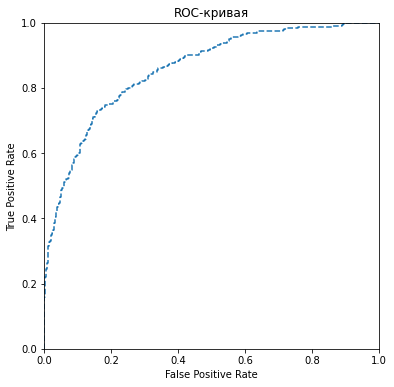

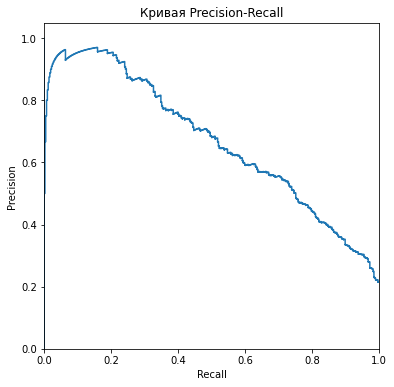

In [26]:
# Использую созданную ранее модель, предсказываю, считаю вероятности для положительного класса
best_model.fit(features_train_valid, target_train_valid)
predicted_test = best_model.predict(features_test)
probabilities_test = best_model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

# Считаю метрики
print('Тест лучшей модели')
print('Score =', best_model.score(features_test, target_test))
print('auc_roc =', roc_auc_score(target_test, probabilities_one_test))
print('precision =', precision_score(target_test, predicted_test))
print('recall =', recall_score(target_test, predicted_test))
print('F1=', f1_score(target_test,predicted_test))

# Строю ROC-кривую
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.show()

# Строю PR-кривую
precision, recall, thresholds = precision_recall_curve(target_test, probabilities_test[:, 1])
plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая Precision-Recall')
plt.show() 

# <a id='toc7_'></a>[Результат](#toc0_)

<style>
    .bordered-cell {
        border: 3px solid black;
        padding: 10px;
    }
</style>

<div class="bordered-cell">

**Модель**

- Модель построена на основе RandomForestClassifier
- Метрики модели
  1. **F1 = 0.6124**
  2. accuracy = 0.8285
  3. auc_roc = 0.8574
  4. precision = 0.566
  5. recall = 0.665
  
**Выводы**
- На данной выборке самый лучший результат дает широкий подбор гиперпараметров и балансировка классов в аргументе к модели. 
- Синтетическое изменение баланса классов в данной работе повредило F1-мере модели

**Дальнейшее развитие модели**
- Хотя данных достаточно для обучения (10к строк), дополнительный сбор новых данных помог бы улучшить модель
- В работе доступно для модели 11 признаков, неплохо было бы расширить их количество, например уточнить место жительства, вид работы, должность, данные родственников и многое другое
- Акцент в работе сделан на борьбе с дисбалансов классов, а не на выборе модели. Если взять в качестве основной модели - какой-либо градиентный бустинг (либо перебрать больше моделей), метрики возможно улучшить
- После появления новых признаков и моделей, стоит оценить feature_importance и дальше работать над обработкой признаков: убрать лишние, преобразовать имеющиеся